This Notebook is my first attempt at implementing the Quantum Jump method for a two level quantum system.

It will contain my first barebone attempts at making functions and implementing sections of the method.

In [5]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from math import log
from scipy.integrate import odeint
import scipy.optimize as opt
from IPython.display import Latex
import time
from scipy.stats import linregress
#%matplotlib inline

In [2]:
def dp(wf, gamma, dt):
    return gamma*np.abs(wf[1])**2*dt
    
def newa(wf, gamma, dt):
    return wf[0]*(1+((gamma*dt)/2)*(np.abs(wf[1])**2))

def newb(wf, gamma, dt):
    return wf[1]*(1-((gamma*dt)/2)*(np.abs(wf[0])**2))#*np.exp(-1j*omega0*dt)
    
    
def newwf(wf, gamma, dt):
    return [newa(wf,gamma,dt),newb(wf,gamma,dt)]

def expdecay(gamma,dt):
    return np.abs(np.exp(-gamma*dt*(1/2)))**2

-1.0
-1.0088286723078062
-0.4633190858367566


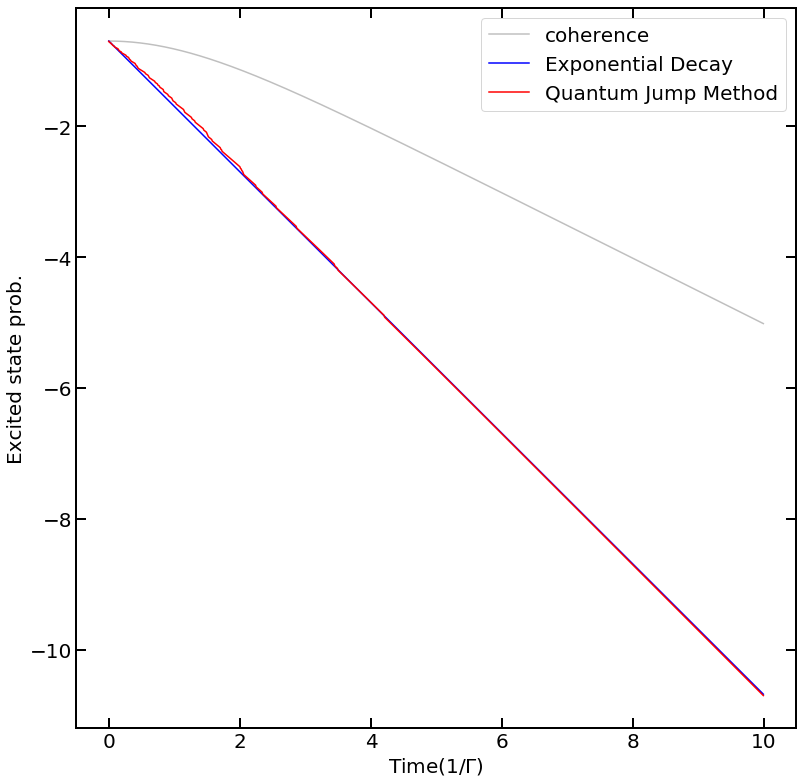

In [73]:
#Plotting code lifted straight from Kalus OBE codes
fig = plt.figure(1)

fs=20

plt.rcParams.update({'font.size': fs})
plt.rcParams.update({'figure.figsize':(10,10)})

lw=6
ax_lw=2
tick_lw=3
tick_len=10


ax=fig.add_axes([0.0, 0.0, 1.0, 1.0])

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(ax_lw)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(width=ax_lw,length=tick_len,direction='in')
ax.yaxis.set_tick_params(width=ax_lw,length=tick_len,direction='in')

color=iter(cm.rainbow(np.linspace(0,1,N)))



#setting constants
t_max=10
t_steps=1000

dt=t_max/t_steps

gamma=1.0

N=100

b0=1/np.sqrt(2)
a0=np.sqrt(1-b0**2)

#######
#main code which runs over N particles

total = np.zeros(t_steps)
jump = np.zeros(N)
raw_data = [] #for coherence data storing 

for nn in range(0,N):
    ts = [] #empty list of times
    bs = [] #empty list of excited state probabilites
    ab = []
    wf=[a0, b0]
    
    for tt in range(0,t_steps+1):

        nwf=newwf(wf, gamma, dt) #calculates new wavefunction at time+dt
        p = dp(wf,gamma,dt)
        e = np.random.rand(1)[0] #generate a random number between 0 and 1
        
        if p>e:#test for quantum jump
            jump[nn] = 1 #jump! 
            wf = [1,0] #wavefunciton jumps to ground state
            prob_b=np.abs(wf[1])**2  #probability of being in excited state
            bs.append(prob_b)
            ab.append(wf[0]*np.conj(wf[1])) # coherence = 0 
            ts.append(dt*tt) #time values
            
        else:
            wf = nwf
            prob_b=np.abs(wf[1])**2  #probability of being in excited state
            bs.append(prob_b)
            ab.append(wf[0]*np.conj(wf[1]))
            ts.append(dt*tt) #time values

    bs=bs[:t_steps]
    ts=ts[:t_steps]
    ab = ab[:t_steps]
    raw_data.append(ab)
    total += bs 

#there are n particles go back to the ground state without photon emission 
n = 0 
coh_tot = np.zeros(t_steps)
for i in range(N): 
    if jump[i] != 1: #no jump for the time-loop 
        n +=1
        coh_tot += raw_data[i]
coh = coh_tot/n 
        

        
        
log_coh = [log(x) for x in coh]
ax.plot(ts,log_coh,alpha=0.5,color='gray',label = 'coherence')


avg = np.array(total/N)
log_avg = [log(x) for x in avg]
ts=np.array(ts)
expys = (b0**2)*expdecay(gamma, ts)
log_expys = [log(x) for x in expys]

ax.plot(ts,log_expys,color='blue',label='Exponential Decay') #plots decay of state 1 probability
ax.plot(ts,log_avg,color='red',label='Quantum Jump Method') #plots average of trajectories

slope_exp, intercept_exp, r_value_exp, p_value_exp, std_err_exp = linregress(ts, log_expys)
print(slope_exp)
slope_avg, intercept_avg, r_value_avg, p_value_avg, std_err_avg = linregress(ts, log_avg)
print(slope_avg)
slope_coh, intercept_coh, r_value_coh, p_value_coh, std_err_coh = linregress(ts, log_coh)
print(slope_coh)

plt.ylabel('Excited state prob.',fontsize=fs)
plt.xlabel('Time(1/$\Gamma$)')
plt.legend()
plt.show()  

-0.4633190858367566
-0.4633190858367566


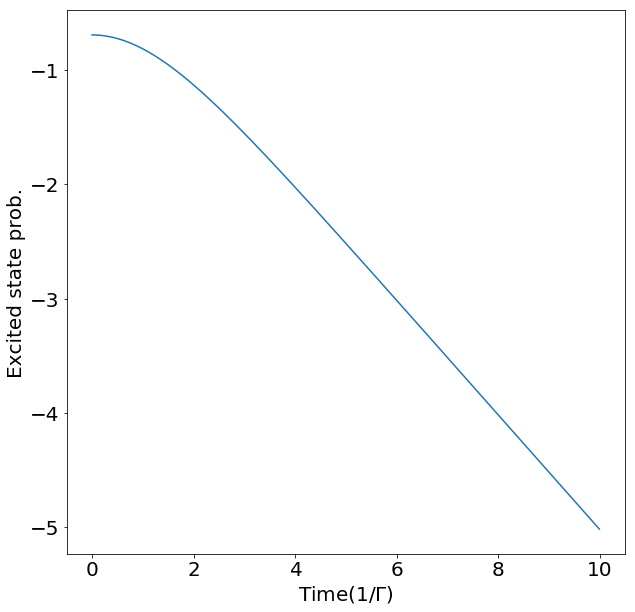

In [59]:
#setting constants
t_max=10
t_steps=1000

dt=t_max/t_steps

gamma=1.0

#######
#main code which runs over N particles
b0=1/np.sqrt(2)
a0=1/np.sqrt(2)
total = np.zeros(t_steps)
jump = np.zeros(N)
raw_data = [] 
coherence = []
for nn in range(0,N):
    ts = [] #empty list of times
    bs = [] #empty list of excited state probabilites
    ab = []
    ba = []
    wf=[a0, b0]
    
    for tt in range(0,t_steps+1):

        nwf=newwf(wf, gamma, dt) #calculates new wavefunction at time+dt
        p = dp(wf,gamma,dt)
        e = np.random.rand(1)[0] #generate a random number between 0 and 1
        
        if p>e:#test for quantum jump
            jump[nn] = 1 
            wf = [1,0] #wavefunciton jumps to ground state
            break
            
        else:
            wf = nwf
            prob_b=np.abs(wf[1])**2  #probability of being in excited state
            bs.append(prob_b)
            ab.append(wf[0]*np.conj(wf[1])) # coherence ab*
            ba.append(wf[1]*np.conj(wf[0])) #coherence ba*
            
            ts.append(dt*tt) #time values
    
    bs=bs[:t_steps]
    ts=ts[:t_steps]
    ab = ab[:t_steps]
    ba = ba[:t_steps]
    break

log_cohab = [log(x) for x in ab]
log_cohba = [log(x) for x in ba]
plt.plot(ts,log_cohab)
#plt.plot(ts,log_cohba)



slope_cohab, intercept_cohab, r_value_cohab, p_value_cohab, std_err_cohab = linregress(ts, log_cohab)
slope_cohba, intercept_cohba, r_value_cohba, p_value_cohba, std_err_cohba = linregress(ts, log_cohba)
print(slope_cohab)
print(slope_cohba)

plt.ylabel('Excited state prob.',fontsize=fs)
plt.xlabel('Time(1/$\Gamma$)')
plt.show()  